In [6]:
import pandas as pd

data = pd.read_csv('amazon.csv')

data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
# describe data
data.describe()

# if describe() is not showing typical statistical measures, e.g. median, mean, min, max
# the dataset is containing mostly categorical or non-numerical data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B08WRWPM22,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [8]:
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [10]:
# identify missing values 

missing_values = data.isnull().sum()

# display col with missing values
print(missing_values[missing_values > 0])

print('----------------------------')

# display % of missing values for each col
missing_percentage = (missing_values / len(data)) * 100

print(missing_percentage[missing_percentage > 0])

rating_count    2
dtype: int64
----------------------------
rating_count    0.136519
dtype: float64


before deailing with missing values, theres a need to analyze the distribution of numerical column

Filling missing values is chosen over removing them to preserve data integrity and prevent loss of important information.
Mean imputation is used for normally distributed numerical data without outliers.
Median imputation is used for skewed numerical data with outliers.
Mode imputation is used for categorical data to ensure valid category values.

In [12]:
# while drawing distribution, we hit TypeError: Horizontal orientation requires numeric `x` variable.
# this occur in `no_of_ratings` col, that means there exist non-empty value that are not numeric

# list of columns to analyse
columns_to_analyse = ['rating', 'rating_count','discounted_price','actual_price']

# func to indentify non-numeric values in a column
def find_non_numeric(df, col):
    # df[column].notna() returns a boolean series indicating non-NaN values
    # pd.to_numeric(df[column], errors='coerce') converts the column to numeric values, setting non-numeric values to NaN
    # isna() returns a boolean series indicating NaN values
    # Combining these two conditions, we get non-numeric values that are not NaNs
    non_numeric_values = df[col][df[col].notna() & pd.to_numeric(df[col], errors='coerce').isna()]
    return non_numeric_values

# check for non-numeric in each of the col
for col in columns_to_analyse:
    non_numeric = find_non_numeric(data, col)
    if not non_numeric.empty:
        print(f'Non-numeric values found in {col}:')
        print(non_numeric)

Non-numeric values found in rating:
1279    |
Name: rating, dtype: object
Non-numeric values found in rating_count:
0       24,269
1       43,994
2        7,928
3       94,363
4       16,905
         ...  
1457     2,518
1460     1,090
1461     4,118
1463     8,031
1464     6,987
Name: rating_count, Length: 1137, dtype: object
Non-numeric values found in discounted_price:
0         ₹399
1         ₹199
2         ₹199
3         ₹329
4         ₹154
         ...  
1460      ₹379
1461    ₹2,280
1462    ₹2,219
1463    ₹1,399
1464    ₹2,863
Name: discounted_price, Length: 1465, dtype: object
Non-numeric values found in actual_price:
0       ₹1,099
1         ₹349
2       ₹1,899
3         ₹699
4         ₹399
         ...  
1460      ₹919
1461    ₹3,045
1462    ₹3,080
1463    ₹1,890
1464    ₹3,690
Name: actual_price, Length: 1465, dtype: object


In [13]:
# count non-numeric values for each specific column

def count_non_numeric_and_percentage(df, col):
    non_numeric_values = find_non_numeric(df, col)
    count = non_numeric_values.shape[0]
    percentage = (count / len(df)) * 100
    return count, percentage

non_numeric_counts = {}
for col in columns_to_analyse:
    count, percentage = count_non_numeric_and_percentage(data, col)
    non_numeric_counts[col] = {'count': count, 'percentage': percentage}
    
# display
for col, val in non_numeric_counts.items():
    print(f"Column: {col}, Non-numeric count: {val['count']}, Percentage: {val['percentage']:.2f}%")

Column: rating, Non-numeric count: 1, Percentage: 0.07%
Column: rating_count, Non-numeric count: 1137, Percentage: 77.61%
Column: discounted_price, Non-numeric count: 1465, Percentage: 100.00%
Column: actual_price, Non-numeric count: 1465, Percentage: 100.00%


In [14]:
import re

def convert_price_column(df, col):
    # remove currency symbols and comma
    df[col] = df[col].apply(lambda x:re.sub(r'[₹,]', '', str(x)))
    # convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
for col in ['discounted_price', 'actual_price', 'rating_count']:
    convert_price_column(data, col)
    
print(data[['discounted_price', 'actual_price','rating_count']].info())
data[['discounted_price', 'actual_price','rating_count']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   discounted_price  1465 non-null   float64
 1   actual_price      1465 non-null   float64
 2   rating_count      1463 non-null   float64
dtypes: float64(3)
memory usage: 34.5 KB
None


,discounted_price,actual_price,rating_count
0,399.0,1099.0,24269.0
1,199.0,349.0,43994.0
2,199.0,1899.0,7928.0
3,329.0,699.0,94363.0
4,154.0,399.0,16905.0


In [15]:
# check again for non-numeric 

for col in columns_to_analyse:
    non_numeric = find_non_numeric(data, col)
    if not non_numeric.empty:
        print(f'Non-numeric values found in {col}:')
        print(non_numeric)

Non-numeric values found in rating:
1279    |
Name: rating, dtype: object


For this, since the non-nummeric values are seemingly meaningless, I will just replaced them with NaN

In [17]:
def fill_non_numeric_with_na(df, col):
    non_numeric_values = df[col][df[col].notna() & pd.to_numeric(df[col], errors='coerce').isna()]
    if not non_numeric_values.empty:
        # replace with NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
fill_non_numeric_with_na(data, 'rating')

print(data[['rating', 'rating_count','actual_price', 'discounted_price']].apply(lambda x: find_non_numeric(data, x.name)).sum())

rating              0.0
rating_count        0.0
actual_price        0.0
discounted_price    0.0
dtype: float64


Done with non-numeric values. Continue with missing values.

In [18]:
# identify missing values 

missing_values = data.isnull().sum()

# display col with missing values
print(missing_values[missing_values > 0])

print('----------------------------')

# display % of missing values for each col
missing_percentage = (missing_values / len(data)) * 100
# :.2f}%"
print(missing_percentage[missing_percentage > 0])

rating          1
rating_count    2
dtype: int64
----------------------------
rating          0.068259
rating_count    0.136519
dtype: float64


In [20]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 7.8/7.8 MB 53.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 128.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 48.8 MB/s eta 0:00:00


In [22]:
!pip install seaborn

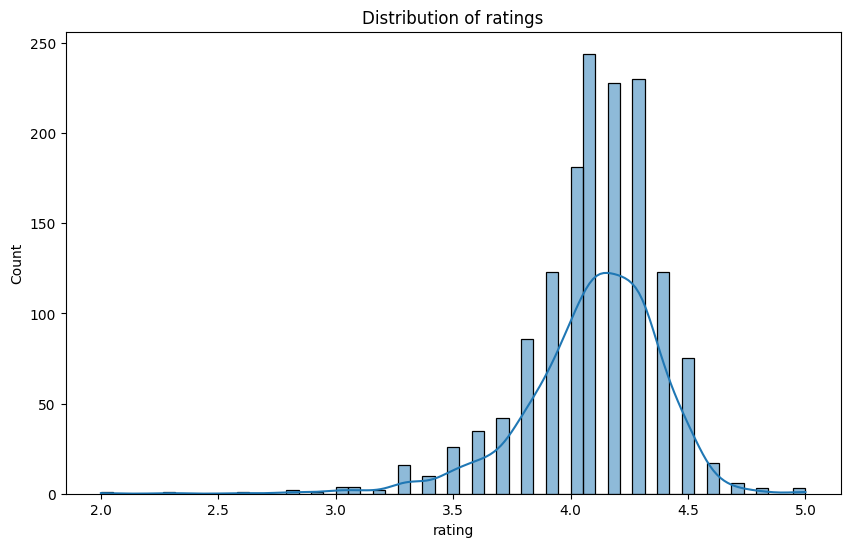

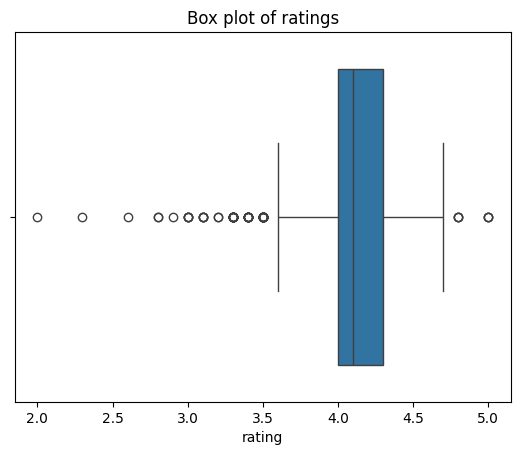

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# it can take time to plot multiple graph, start with ratings

# visualization for ratings

plt.figure(figsize = (10,6))
sns.histplot(data['rating'], kde = True)
plt.title(f'Distribution of ratings')
plt.show()
    
sns.boxplot(x=data['rating'])
plt.title(f'Box plot of ratings')
plt.show()

since from the box plot and the distribution curve, the data on ratings seems to be left skewed. We will use median imputation for missing value in ratings.

In [25]:
data[['rating_count']]

ratings_null = pd.isnull(data['rating_count'])
data[ratings_null]

print(data['rating_count'].max(), data['rating_count'].min())

426973.0 2.0


Since the huge difference and range make it hard to visualize, we will normalize the data.

Common transformation: Logarithmic Transformation

In [27]:
import numpy as np

data['log_rating_count'] = np.log1p(data['rating_count'])  # log1p is used to handle log(0)

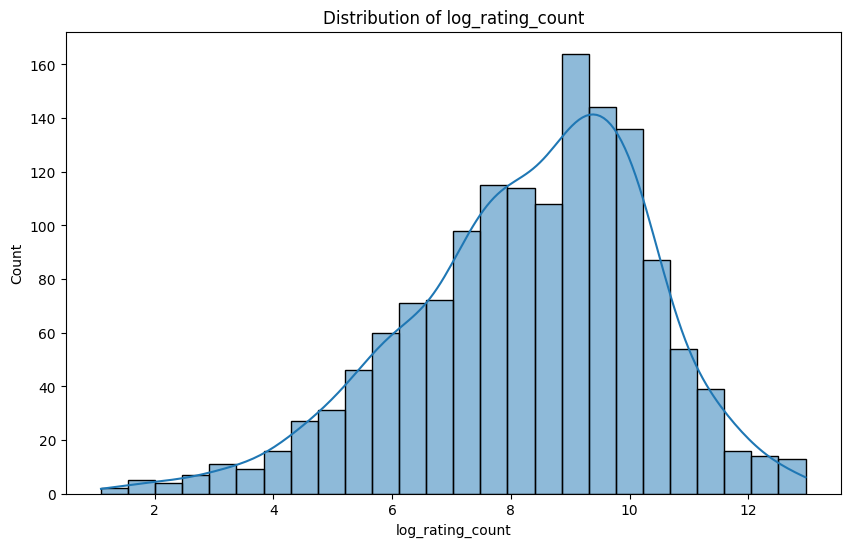

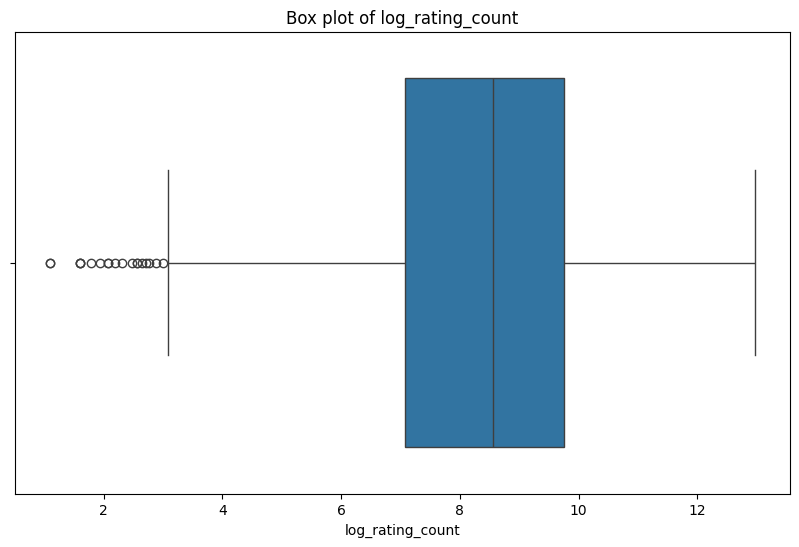

In [28]:
# visualization for log_no_of_ratings

plt.figure(figsize = (10,6))
sns.histplot(data['log_rating_count'], kde=True)
plt.title(f'Distribution of log_rating_count')
plt.show()
    
plt.figure(figsize = (10,6))
sns.boxplot(x=data['log_rating_count'])
plt.title(f'Box plot of log_rating_count')
plt.show()

no_of_ratings is left skewed, use median imputation

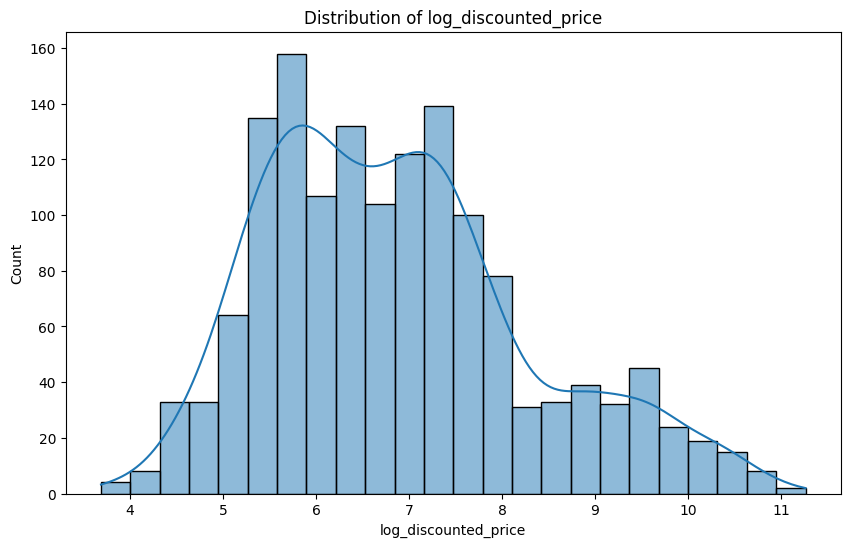

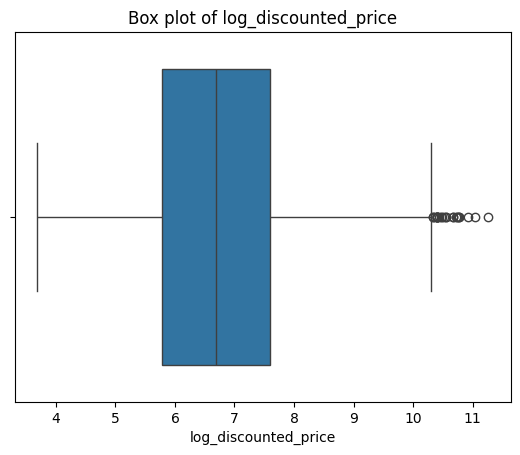

In [29]:
# visualization for discount_price

data['log_discounted_price'] = np.log1p(data['discounted_price'])

plt.figure(figsize = (10,6))
sns.histplot(data['log_discounted_price'], kde = True)
plt.title(f'Distribution of log_discounted_price')
plt.show()
    
sns.boxplot(x=data['log_discounted_price'])
plt.title(f'Box plot of log_discounted_price')
plt.show()

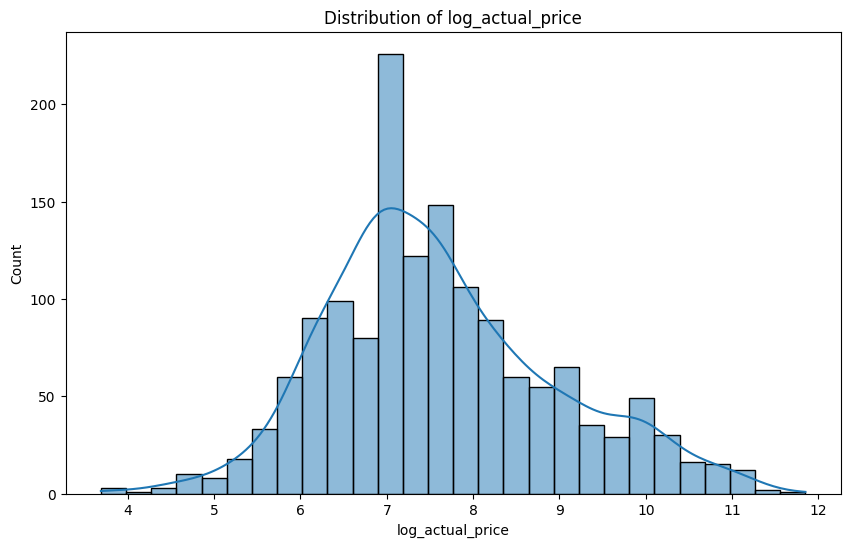

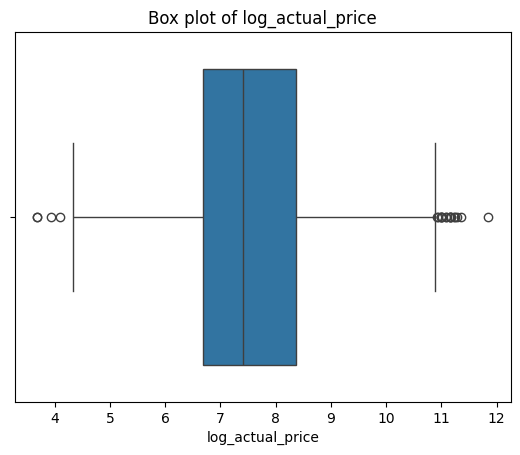

In [30]:
# visualization for actual_price

data['log_actual_price'] = np.log1p(data['actual_price'])

plt.figure(figsize = (10,6))
sns.histplot(data['log_actual_price'], kde = True)
plt.title(f'Distribution of log_actual_price')
plt.show()
    
sns.boxplot(x=data['log_actual_price'])
plt.title(f'Box plot of log_actual_price')
plt.show()

Will be using Median Imputation for all missing values 

In [31]:
for column in ['rating', 'rating_count', 'discounted_price', 'actual_price']:
    data[column].fillna(data[column].median(), inplace=True)

C:\Users\pig_a\AppData\Local\Temp\ipykernel_18232\391587541.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
C:\Users\pig_a\AppData\Local\Temp\ipykernel_18232\391587541.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [32]:
# verify that there are no more missing values in `columns_to_analyse`

print(data[columns_to_analyse].isnull().sum().sum())

0


In [33]:
print(data.duplicated().sum())

# drop duplicate rows 
# data.drop_duplicates(inplace=True)

0


In [36]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates f

In [34]:
# scale numeric features (ratings for collaborative filtering)

from sklearn.preprocessing import StandardScaler

# initialize the scaler
scaler = StandardScaler()

data['rating'] = scaler.fit_transform(data[['rating']])

data['rating'].head()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# identify non-string values in a column
def find_non_string_values(df, column):
    non_string_values = df[column][~df[column].apply(lambda x: isinstance(x, str))]
    return non_string_values

# Check for non-string values in 'main_category' and 'sub_category'
non_string_main_category = find_non_string_values(data, 'main_category')
non_string_sub_category = find_non_string_values(data, 'sub_category')

print(f"Non-string values in 'main_category':\n{non_string_main_category}\n")
print(f"Non-string values in 'sub_category':\n{non_string_sub_category}\n")


In [ ]:
# categorical encoding 

# use TF-IDF Vectorization for text features 
# or
# One-Hot Encoding for categorical features.

from sklearn.preprocessing import OneHotEncoder

# one-hot encoding for main_category & sub_category
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data[['main_category', 'sub_category']])

# create a df with the encoded features
encoded_df = pd.DataFrame(
    encoded_features, 
    columns=encoder.get_feature_names_out(['main_category', 'sub_category'])
)

# concatenate the encoded features with the original data
data = pd.concat([data, encoded_df], axis=1)

# Drop the original categorical columns
data.drop(['main_category', 'sub_category'], axis=1, inplace=True)

data.head()

In [ ]:
data = data.rename(columns={'Unnamed: 0':'index'})

In [ ]:
# List of columns to keep for content-based and collaborative filtering

columns_to_keep = ['index', 'name', 'ratings'] + list(encoded_df.columns)

# Drop irrelevant columns
data = data[columns_to_keep]

# Verify the DataFrame after dropping irrelevant columns
print(data.head())
print(data.columns)


In [ ]:
# use TF-IDF vectorization 
# to transform the name column into a format suitable for computing similarities

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the 'name' column
tfidf_matrix = tfidf_vectorizer.fit_transform(data['name'])

# Verify the shape of the TF-IDF matrix
print(tfidf_matrix.shape)


In [ ]:
# combine TF-IDF with encoded main_category and sub_category
import scipy.sparse as sp

# Combine TF-IDF matrix with encoded categorical features
encoded_columns = [col for col in data.columns if col.startswith('main_category_') or col.startswith('sub_category_')]
encoded_matrix = data[encoded_columns].values

# Stack the TF-IDF matrix and the encoded matrix horizontally
combined_matrix = sp.hstack([tfidf_matrix, encoded_matrix], format='csr')

# Verify the shape of the combined matrix
print(combined_matrix.shape)

In [ ]:
# compute the cosine similarity for content-based filtering 
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(combined_matrix, combined_matrix)

# Function to get content-based recommendations
def get_content_based_recommendations(item_index, num_recommendations=5):
    sim_scores = list(enumerate(cosine_sim[item_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    item_indices = [i[0] for i in sim_scores]
    return data.iloc[item_indices]

# Example usage
print(get_content_based_recommendations(0))


In [ ]:
from scipy.sparse.linalg import svds
import numpy as np

# Create a user-item matrix
user_item_matrix = data.pivot(index='user_id', columns='item_id', values='ratings').fillna(0)

# Perform SVD
U, sigma, Vt = svds(user_item_matrix, k=50)

# Convert sigma to a diagonal matrix
sigma = np.diag(sigma)

# Reconstruct the ratings matrix
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Create a DataFrame for the predicted ratings
predicted_ratings = pd.DataFrame(all_user_predicted_ratings, columns=user_item_matrix.columns)

# Function to get collaborative filtering recommendations
def get_collaborative_recommendations(user_id, num_recommendations=5):
    user_row_number = user_item_matrix.index.get_loc(user_id)
    sorted_user_predictions = predicted_ratings.iloc[user_row_number].sort_values(ascending=False)
    recommended_items = sorted_user_predictions.head(num_recommendations).index
    return data[data['item_id'].isin(recommended_items)]

# Example usage
print(get_collaborative_recommendations(user_id=1))
